# Imports

In [32]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Data Reading

In [33]:
background = Table.read_table("Background.csv")
grades = Table.read_table("Grades.csv")
background.show()

ID,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


# 2. Columns & Rows reporting

In [34]:
grades.num_rows

1000

In [35]:
grades.labels

('ID', 'math score', 'reading score', 'writing score')

In [36]:
background.num_rows

1000

In [37]:
background.labels

('ID',
 'gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course')

# 3. Average grade

In [38]:
grades = grades.with_columns("Average Score", grades.column('math score')*0.4 + grades.column('reading score')*0.3 + grades.column('writing score')*0.3)
grades

ID,math score,reading score,writing score,Average Score
0,72,72,74,72.6
1,69,90,88,81
2,90,95,93,92.4
3,47,57,44,49.1
4,76,78,75,76.3
5,71,83,78,76.7
6,88,95,92,91.3
7,40,43,39,40.6
8,64,64,67,64.9
9,38,60,50,48.2


# 4. Sorting

In [39]:
def get_money(money):
    return "{}$".format(round(money, 1))

In [40]:
get_money(3.5555)

'3.6$'

In [41]:
grades.sort("Average Score", descending=True)

ID,math score,reading score,writing score,Average Score
962,100,100,100,100
916,100,100,100,100
458,100,100,100,100
114,99,100,100,99.6
712,98,100,99,98.9
179,97,100,100,98.8
625,100,97,99,98.8
165,96,100,100,98.4
149,100,100,93,97.9
685,94,99,100,97.3


In [42]:
over_95 = grades.where("Average Score", are.above(95))
over_95.num_rows

20

# 5. Scatter Plots

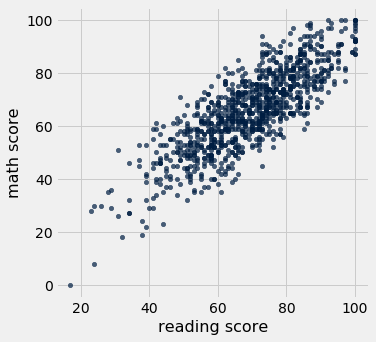

In [43]:
grades.scatter('reading score', 'math score')

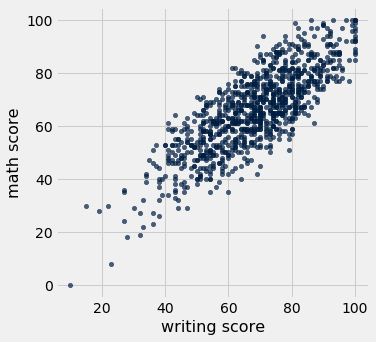

In [44]:
grades.scatter('writing score', 'math score')

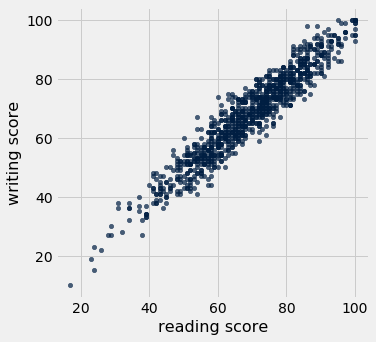

In [45]:
grades.scatter('reading score', 'writing score')

# 6. Gender Analysis

In [46]:
my_table = background.join("ID", grades, "ID")
my_table = my_table.drop("race/ethnicity", 'parental level of education', "lunch", "test preparation course")
males = my_table.where("gender", are.equal_to("male"))
females = my_table.where("gender", are.equal_to("female"))


# 7. Letter Grade

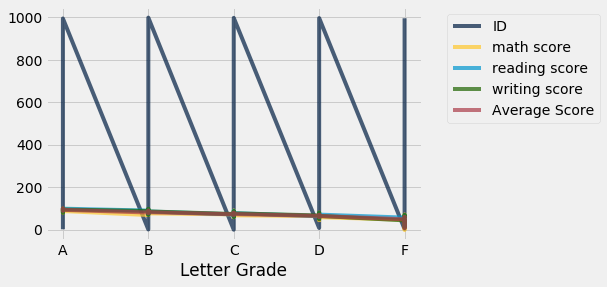

In [47]:
def letter_grade(x):
    if x >= 90: 
        return "A"
    elif 80 <= x <= 90:
        return "B"
    elif 70 <= x <= 80:
        return "C"
    elif 60 <= x <= 70:
        return "D"
    elif x < 60:
        return "F"
letter = grades.apply(letter_grade, "Average Score")
grades = grades.with_column("Letter Grade", letter)
grades.group("Letter Grade")
grades.plot("Letter Grade")

# 8. Race/Ethnic Group Analysis

In [48]:
my_table = background.join("ID", grades, "ID")
my_table.group("race/ethnicity")

f_table = my_table.where("Letter Grade", "F")
f_table.group("race/ethnicity").sort("count" , descending = True).show(1)




race/ethnicity,count
group C,98


# 9. Failed Math, More than 70 Reading

In [49]:
failed_math = grades.where("math score", are.below(60))
failed_math.where("reading score", are.above_or_equal_to(70))

ID,math score,reading score,writing score,Average Score,Letter Grade
32,56,72,65,63.5,D
41,58,73,68,65.5,D
48,57,74,76,67.8,D
88,58,70,67,64.3,D
108,52,76,70,64.6,D
152,59,70,66,64.4,D
167,58,76,78,69.4,D
178,52,70,62,60.4,D
247,58,70,68,64.6,D
308,53,71,67,62.6,D


# 10. Course Preparation Distributions

AttributeError: 'Rectangle' object has no property 'bin'

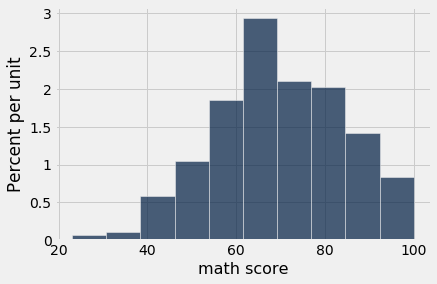

In [50]:

bins = make_array(0, 50, 60, 65, 70, 75, 80, 90, 100)
attended = background.join("ID", grades, "ID").where('test preparation course', 'completed')
attended.hist('math score', bin = bins)


AttributeError: 'Rectangle' object has no property 'bin'

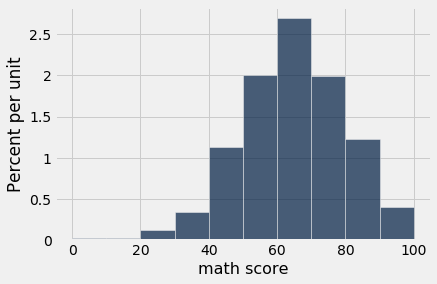

In [51]:
none_attended = background.join("ID", grades, "ID").where('test preparation course', 'none')
none_attended.hist('math score', bin = bins)

# 11. Education Level

In [56]:
no_highschool = background.join("ID", grades, "ID").where('parental level of education', are.not_containing('highschool'))
my_table = background.join("ID", grades, "ID")
no_highschool_count = no_highschool.where("Letter Grade", are.below_or_equal_to("B")).num_rows
all_count = my_table.where("Letter Grade", are.below_or_equal_to("B")).num_rows
percent_nohs = no_highschool_count/no_highschool.num_rows
percent_all = all_count/my_table.num_rows

percent_nohs, percent_all

(0.196, 0.196)

# 12. Gender/Ethnic Grid

In [52]:
grades.join("ID", background, "ID").where("Letter Grade", "A").pivot('race/ethnicity', 'gender')

gender,group A,group B,group C,group D,group E
female,1,5,6,11,11
male,3,2,6,1,3
